In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Cara meng-extract kolom menjadi list:
#Code:
# nama variabel = nama_tabel["nama_kolom"].tolist()

sepal_length = df["SepalLengthCm"].tolist()
sepal_length[:5]

[5.1, 4.9, 4.7, 4.6, 5.0]

In [4]:
#Cara meng-extract nama kolom:
nama_kolom = list(df.columns)
nama_kolom

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

# Task

1. Provide type of variables (discrete, nominal, etc)

2. Produce <b>interpretable</b> result using:
    - Mean
    - Median
    - Modus
    - Quartile 1 & 3
    - Percentile 90, 99
    - Histogram

In [5]:
#Import Libraries
import numpy as np #matematika
import pandas as pd #data frame
from scipy import stats as st #statistika

# data visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab

# Type of variables

In [6]:
print ('Bentuk atau ukuran dataset: ', df.shape)
print (df.info())

Bentuk atau ukuran dataset:  (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


Type of variables:
- Id = discrete
- Sepal length, sepal width, petal length, petal width = continuous
- Species = nominal

In [7]:
# Drop kolom Id, karena hanya penomoran saja
df = df.drop('Id',axis=1)

In [8]:
# cek data pada kolom Species
print(pd.value_counts(df.Species))
print("Data points untuk setiap kelas 'Species' berimbang, yaitu sebanyak 50")

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64
Data points untuk setiap kelas 'Species' berimbang, yaitu sebanyak 50


# Nilai mean atau rata-rata variabel untuk tiap species dan keseluruhan

In [9]:
spe_mean = df.groupby('Species').mean()
all_mean = df.mean()
means = spe_mean.append(all_mean, ignore_index=True)
means.insert(0, 'Species', ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'All_species'])
means

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,5.006000,3.418,1.464000,0.244000
1,Iris-versicolor,5.936000,2.770,4.260000,1.326000
2,Iris-virginica,6.588000,2.974,5.552000,2.026000
3,All_species,5.843333,3.054,3.758667,1.198667


# Nilai median variabel untuk tiap species dan keseluruhan

In [10]:
spe_median = df.groupby('Species').median()
all_median = df.median()
median = spe_median.append(all_median, ignore_index=True)
median.insert(0, 'Species', ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'All_species'])
median

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,5.0,3.4,1.50,0.2
1,Iris-versicolor,5.9,2.8,4.35,1.3
2,Iris-virginica,6.5,3.0,5.55,2.0
3,All_species,5.8,3.0,4.35,1.3


# Nilai modus atau yang paling banyak muncul dari variabel untuk tiap species dan keseluruhan

In [11]:
spe_mode = df.groupby('Species').apply(lambda x: x.mode().iloc[0])
all_mode = df.mode(numeric_only=True)
mode = spe_mode.append(all_mode, ignore_index=True)
modes = mode.replace(np.nan, 'All-species', regex=True)
modes

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.0,3.4,1.5,0.2,Iris-setosa
1,5.5,3.0,4.5,1.3,Iris-versicolor
2,6.3,3.0,5.1,1.8,Iris-virginica
3,5.0,3.0,1.5,0.2,All-species


# Nilai quartile 1 dari variabel untuk tiap species dan keseluruhan

In [12]:
spe_q1 = df.groupby('Species').quantile(0.25)
all_q1 = df.quantile(0.25)
q1 = spe_q1.append(all_q1, ignore_index=True)
q1.insert(0, 'Species', ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'All_species'])
q1

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,4.800,3.125,1.4,0.2
1,Iris-versicolor,5.600,2.525,4.0,1.2
2,Iris-virginica,6.225,2.800,5.1,1.8
3,All_species,5.100,2.800,1.6,0.3


# Nilai quartile 3 dari variabel untuk tiap species dan keseluruhan

In [13]:
spe_q3 = df.groupby('Species').quantile(0.75)
all_q3 = df.quantile(0.75)
q3 = spe_q3.append(all_q3, ignore_index=True)
q3.insert(0, 'Species', ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'All_species'])
q3

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,5.2,3.675,1.575,0.3
1,Iris-versicolor,6.3,3.000,4.600,1.5
2,Iris-virginica,6.9,3.175,5.875,2.3
3,All_species,6.4,3.300,5.100,1.8


# Nilai interquartile dari variabel untuk tiap species dan keseluruhan

In [14]:
iqr = q3.drop('Species', axis=1) - q1.drop('Species', axis=1)
iqr.insert(0, 'Species', ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'All_species'])
iqr

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,0.400,0.550,0.175,0.1
1,Iris-versicolor,0.700,0.475,0.600,0.3
2,Iris-virginica,0.675,0.375,0.775,0.5
3,All_species,1.300,0.500,3.500,1.5


# Nilai percentile 90 dari variabel untuk tiap species dan keseluruhan

In [15]:
spe_per90 = df.groupby('Species').quantile(0.9)
all_per90 = df.quantile(0.9)
per90 = spe_per90.append(all_per90, ignore_index=True)
per90.insert(0, 'Species', ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'All_species'])
per90

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,5.41,3.90,1.70,0.40
1,Iris-versicolor,6.70,3.11,4.80,1.51
2,Iris-virginica,7.61,3.31,6.31,2.40
3,All_species,6.90,3.61,5.80,2.20


# Nilai percentile 99 dari variabel untuk tiap species dan keseluruhan

In [16]:
spe_per99 = df.groupby('Species').quantile(0.99)
all_per99 = df.quantile(0.99)
per99 = spe_per99.append(all_per99, ignore_index=True)
per99.insert(0, 'Species', ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'All_species'])
per99

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,5.751,4.302,1.900,0.551
1,Iris-versicolor,6.951,3.351,5.051,1.751
2,Iris-virginica,7.802,3.800,6.802,2.500
3,All_species,7.700,4.151,6.700,2.500


# Plotting histogram

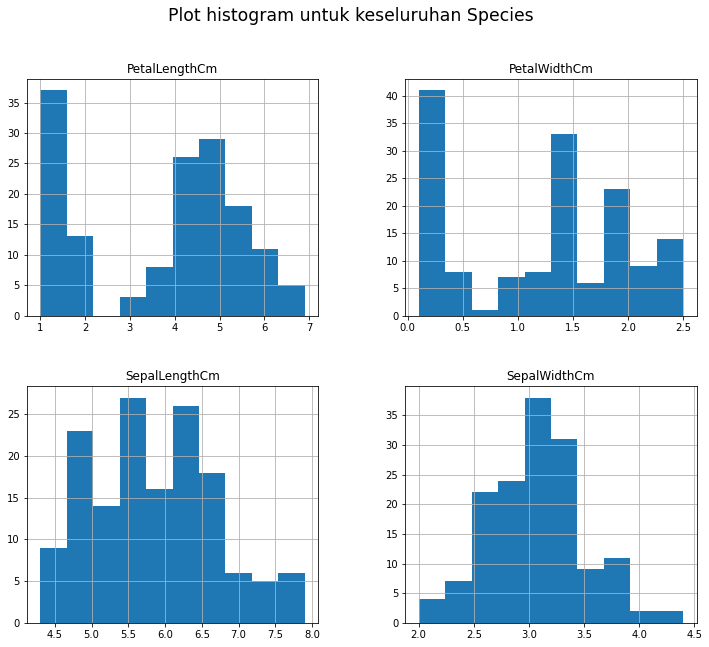

In [17]:
df.hist(figsize = (12, 10))
pylab.suptitle("Plot histogram untuk keseluruhan Species", fontsize="xx-large")
plt.show()

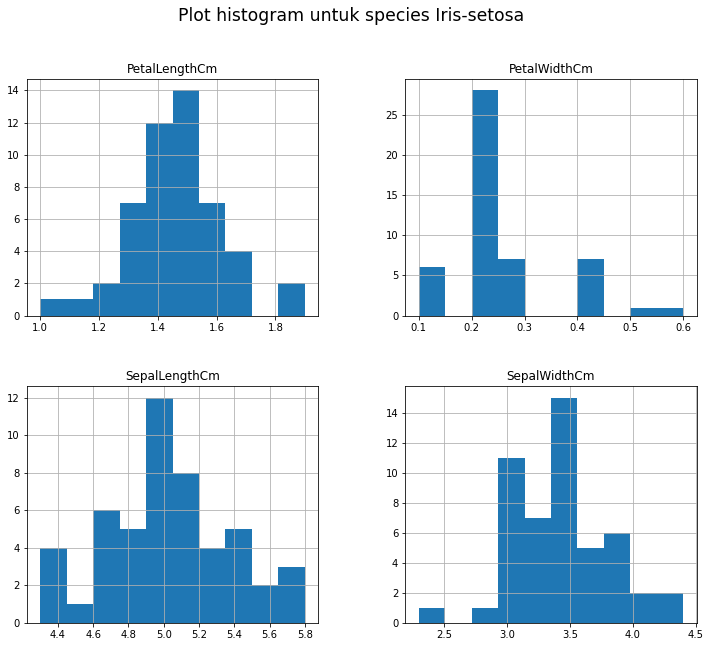

In [18]:
df[df['Species']=='Iris-setosa'].hist(figsize = (12, 10))
pylab.suptitle("Plot histogram untuk species Iris-setosa", fontsize="xx-large")
plt.show()

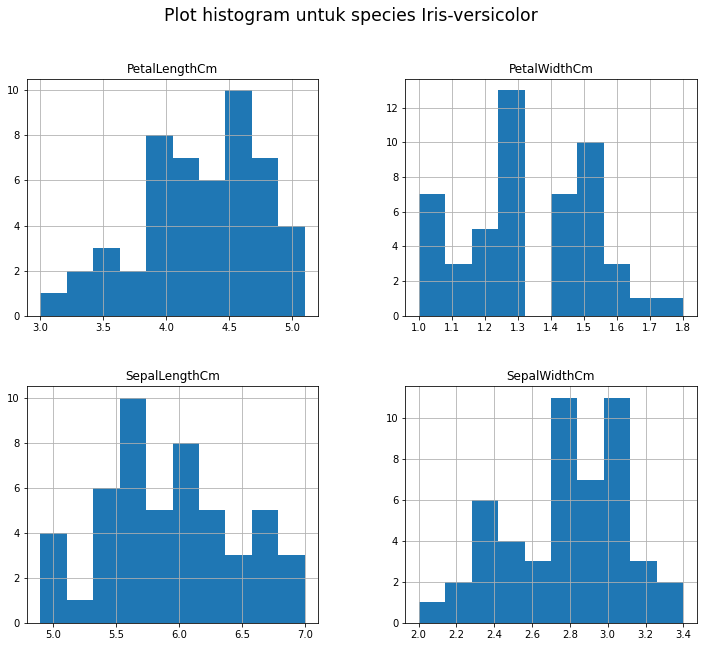

In [19]:
df[df['Species']=='Iris-versicolor'].hist(figsize = (12, 10))
pylab.suptitle("Plot histogram untuk species Iris-versicolor", fontsize="xx-large")
plt.show()

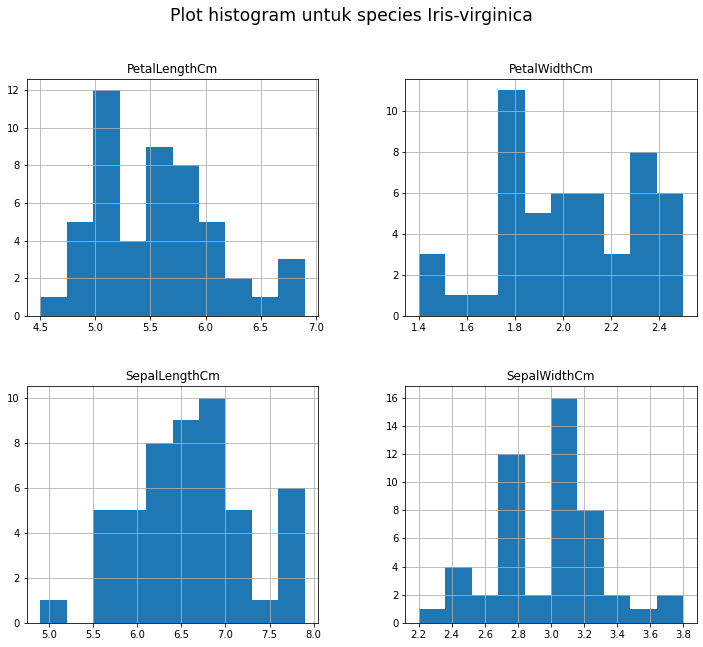

In [20]:
df[df['Species']=='Iris-virginica'].hist(figsize = (12, 10))
pylab.suptitle("Plot histogram untuk species Iris-virginica", fontsize="xx-large")
plt.show()

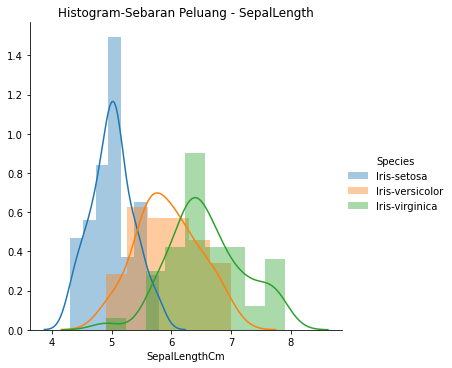

In [21]:
sns.FacetGrid(df,hue='Species',height=5).map(sns.distplot,'SepalLengthCm').add_legend()
plt.title("Histogram-Sebaran Peluang - SepalLength")
plt.show()

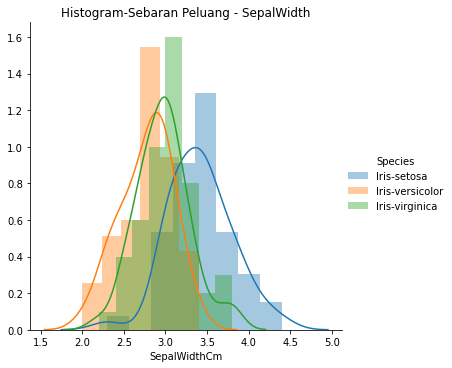

In [22]:
sns.FacetGrid(df,hue='Species',height=5).map(sns.distplot,'SepalWidthCm').add_legend()
plt.title("Histogram-Sebaran Peluang - SepalWidth")
plt.show()

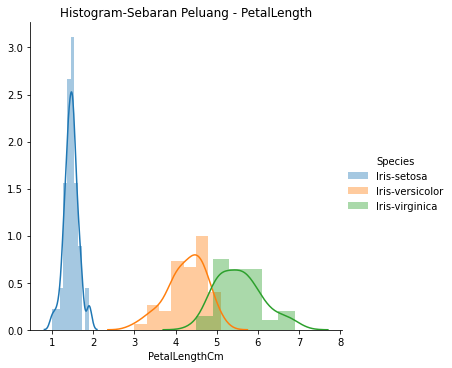

In [23]:
sns.FacetGrid(df,hue='Species',height=5).map(sns.distplot,'PetalLengthCm').add_legend()
plt.title("Histogram-Sebaran Peluang - PetalLength")
plt.show()

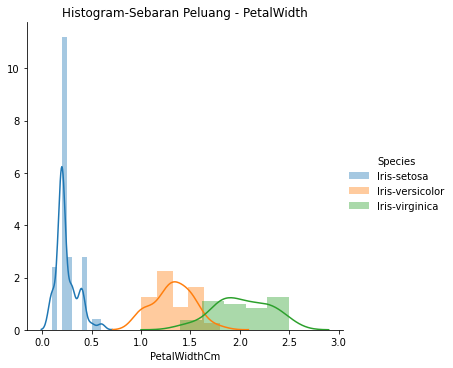

In [24]:
sns.FacetGrid(df,hue='Species',height=5).map(sns.distplot,'PetalWidthCm').add_legend()
plt.title("Histogram-Sebaran Peluang - PetalWidth")
plt.show()

# Pengamatan
- Berdasarkan plotting di atas, dari ukuran petal length dan petal width, kita dapat mengetahui jenis/spesies bunga. Karena distribusi nilai yang berbeda untuk tiap spesiesnya. Khususnya untuk Iris-setosa.
Sedangkan untuk sepal length dan sepal width banyak data yang overlapping untuk tiap spesiesnya.

# Good Luck